In [1]:
%matplotlib widget
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

In [2]:
dataM1 = pd.read_csv("GBPUSD_M1.csv")
dataM1['Time'] = pd.to_datetime(dataM1['Time'])

dataH1 = pd.read_csv("GBPUSD_H1.csv")
dataH1['Time'] = pd.to_datetime(dataH1['Time'])

[[ 1.29876]
 [ 1.29908]
 [ 1.29871]
 [ 1.29958]
 [ 1.29925]
 [ 1.29866]
 [ 1.29834]
 [ 1.29863]
 [ 1.29817]
 [ 1.29837]
 [ 1.29776]
 [ 1.29928]
 [ 1.30071]
 [ 1.30155]
 [ 1.30085]
 [ 1.29967]
 [ 1.29973]
 [ 1.3007 ]
 [ 1.30099]
 [ 1.30104]
 [ 1.3008 ]
 [ 1.30124]
 [ 1.30108]
 [ 1.30106]
 [ 1.30126]
 [ 1.30143]
 [ 1.30135]
 [ 1.30159]
 [ 1.30223]
 [ 1.30205]
 [ 1.30213]
 [ 1.30246]
 [ 1.30602]
 [ 1.30519]
 [ 1.30409]
 [ 1.30344]
 [ 1.30466]
 [ 1.30451]
 [ 1.30488]
 [ 1.30491]
 [ 1.30356]
 [ 1.30209]
 [ 1.30437]
 [ 1.3043 ]
 [ 1.30451]
 [ 1.30424]
 [ 1.30467]
 [ 1.30431]
 [ 1.30516]
 [ 1.30516]
 [ 1.30428]
 [ 1.30463]
 [ 1.30499]
 [ 1.30497]
 [ 1.30401]
 [ 1.30419]
 [ 1.30281]
 [ 1.30216]
 [ 1.3026 ]
 [ 1.3019 ]
 [ 1.30214]
 [ 1.30186]
 [ 1.3029 ]
 [ 1.30231]
 [ 1.30011]
 [ 1.29793]
 [ 1.29867]
 [ 1.29876]
 [ 1.29783]
 [ 1.29837]
 [ 1.29842]
 [ 1.29829]
 [ 1.2981 ]
 [ 1.29822]
 [ 1.29802]
 [ 1.29897]
 [ 1.29864]
 [ 1.29946]
 [ 1.29992]
 [ 1.29966]
 [ 1.30069]
 [ 1.30091]
 [ 1.29888]
 [ 1

"\ntotal_points = study_length + 1\n\ny_preds = np.empty(total_points)\nstd_preds = np.empty(total_points)\ntime_preds = np.empty(total_points, dtype='datetime64[ms]')\n\nfor i in range(total_points):\n    window_slice = slice(start_index - window_size + i, start_index + 1 + i)\n    y = close_arr[window_slice].reshape(-1, 1)\n    \n    gpr.fit(X, y)\n    y_pred, std = gpr.predict([[window_size]], return_std=True)\n    \n    y_preds[i] = y_pred.item()\n    std_preds[i] = std.item()\n    time_preds[i] = time_arr[start_index + i]\n\n"

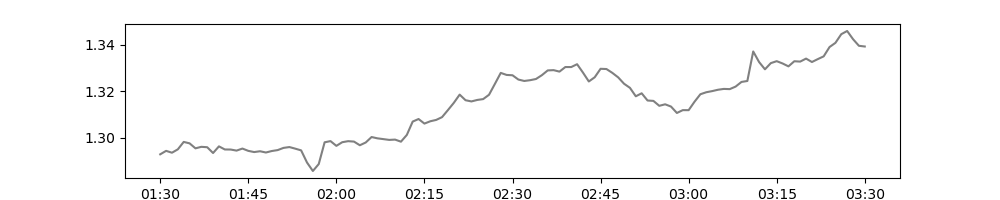

In [ ]:
time_arrH1 = dataH1['Time'].values.astype('datetime64[ms]')
close_arrH1 = dataH1['Close'].values

time_arrM1 = dataM1['Time'].values.astype('datetime64[ms]')
close_arrM1 = dataM1['Close'].values

study_start = np.datetime64("2024-10-23T01:30")
start_indexH1 = np.searchsorted(time_arrH1, study_start)
start_indexM1 = np.searchsorted(time_arrM1, study_start)

study_length = 2 # hour bars

fig, ax = plt.subplots(figsize=(10,2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

ax.plot(time_arrM1[start_indexM1:start_indexM1+study_length*60+1], 
         close_arrH1[start_indexM1:start_indexM1+study_length*60+1], color='gray')


kernel = Matern(length_scale=1.0, nu=1.5)
gpr = GaussianProcessRegressor(kernel=kernel, alpha=1, n_restarts_optimizer=0, normalize_y=True)

window_size = 100 # hour bars


X = np.arange(window_size+1, dtype=float)[:, None]
window_slice = slice(start_indexH1 - window_size, start_indexH1 + 1 )
y = close_arrH1[window_slice].reshape(-1, 1)

X[-1] = X[-2]+(1/60)
y[-1] = 0

print(y)
"""
total_points = study_length + 1

y_preds = np.empty(total_points)
std_preds = np.empty(total_points)
time_preds = np.empty(total_points, dtype='datetime64[ms]')

for i in range(total_points):
    window_slice = slice(start_index - window_size + i, start_index + 1 + i)
    y = close_arr[window_slice].reshape(-1, 1)
    
    gpr.fit(X, y)
    y_pred, std = gpr.predict([[window_size]], return_std=True)
    
    y_preds[i] = y_pred.item()
    std_preds[i] = std.item()
    time_preds[i] = time_arr[start_index + i]

"""

In [ ]:
plt.clf()

time_arr = dataH1['Time'].values.astype('datetime64[ms]')
close_arr = dataH1['Close'].values

study_start = np.datetime64("2024-10-23T01:00")
start_index = np.searchsorted(time_arr, study_start)
study_length = 2 # hour bars

kernel = Matern(length_scale=1.0, nu=1.5)
gpr = GaussianProcessRegressor(kernel=kernel, alpha=1, n_restarts_optimizer=0, normalize_y=True)

window_size = 100
X = np.arange(window_size + 1, dtype=float)[:, None]
total_points = study_length + 1

y_preds = np.empty(total_points)
std_preds = np.empty(total_points)
time_preds = np.empty(total_points, dtype='datetime64[ms]')

for i in range(total_points):
    window_slice = slice(start_index - window_size + i, start_index + 1 + i)
    y = close_arr[window_slice].reshape(-1, 1)
    
    gpr.fit(X, y)
    y_pred, std = gpr.predict([[window_size]], return_std=True)
    
    y_preds[i] = y_pred.item()
    std_preds[i] = std.item()
    time_preds[i] = time_arr[start_index + i]
    

plt.plot(time_preds, y_preds)
plt.fill_between(time_preds, 
                y_preds - 1.96 * std_preds,
                y_preds + 1.96 * std_preds,
                alpha=0.2, color='blue')



